In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
print("Set up")

Set up


In [32]:
d = 1.06e-3
d_err = 5e-6
l = 1.71
l_err = 5e-3
m = 204.4e-3
m_err = 0.1e-3
b = 41e-3
b_err = 5e-5
rs = [70e-3, 85e-3, 100e-3, 115e-3, 130e-3]
r_err = 5e-4

In [33]:
list([(r+b/2)**2 for r in rs])

[0.008190250000000001,
 0.011130250000000003,
 0.014520250000000002,
 0.01836025,
 0.022650249999999997]

In [34]:
data = pd.read_csv("../data/lol.csv")
data

,n,70,85,100,115,130
0,1,2.78,3.19,3.44,3.80,4.20
1,2,5.55,6.30,6.89,7.53,8.45
2,3,8.20,9.35,10.31,11.34,12.59
3,4,10.90,12.42,13.76,15.07,16.81
4,5,13.69,15.59,17.20,18.88,21.04
5,6,16.50,18.76,20.63,22.60,25.18
6,7,19.31,21.83,24.08,26.42,29.42
7,8,22.11,24.88,27.52,30.14,33.63
8,9,24.91,27.99,30.95,33.96,37.78
9,10,27.70,31.18,34.40,37.96,42.03


t70 = 2.7734216027874563 +/- 0.006444778708191963
t85 = 3.114090592334495 +/- 0.006681048044314838
t100 = 3.4399163763066207 +/- 0.005010864652737793
t115 = 3.7715505226480834 +/- 0.005410186266163487
t130 = 4.193951219512196 +/- 0.005974764358793127


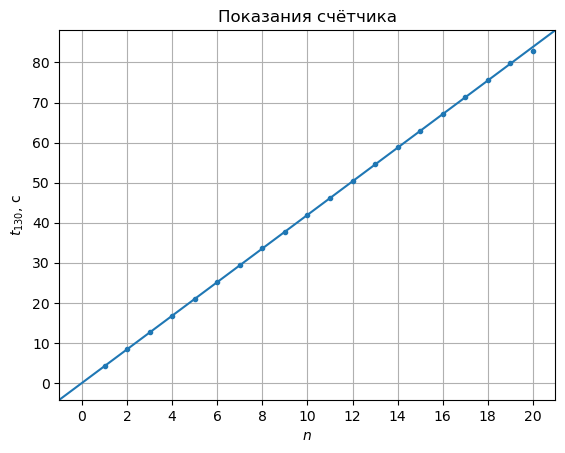

In [35]:
ts = []
t_errs = []

for i in ["70", "85", "100", "115", "130"]:
    plt.clf()
    plt.title("Показания счётчика")
    plt.xlabel("$n$")
    plt.ylabel("$t_" + "{" + f"{i}" + "}" + "$, с")
    plt.grid(True)
    plt.plot(data["n"], data[i], ".")
    n = len(data["n"])
    t = np.mean(data[i] * data["n"]) / np.mean(data["n"]**2)
    t_err = math.sqrt(1/n/(n-1)*sum([(x - t)**2 for x in data[i]/data["n"]]))
    t_err = math.sqrt(t_err**2+(5e-3)**2)
    ts.append(t)
    t_errs.append(t_err)
    print(f"t{i} = {t} +/- {t_err}")
    plt.axline((0, 0), (20, t*20))
    plt.xticks(range(0, 21, 2), list(map(str, range(0, 21, 2))))
    plt.yticks(range(0, int(20*t), 10), list(map(str, range(0, int(20*t), 10))))
    plt.savefig("../img/" + i + ".png")

In [36]:
xs

[0.00245025, 0.00416025, 0.00632025, 0.00893025, 0.01199025]

In [37]:
ys

[7.691867386808143,
 9.697560217266204,
 11.833024675982474,
 14.224593344887031,
 17.58922683164784]

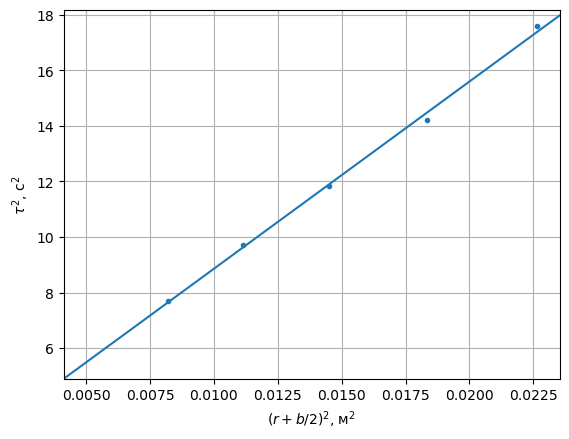

In [38]:
xs = [(r+b/2)**2 for r in rs]
ys = [t**2 for t in ts]
k, b = np.polyfit(xs, ys, 1)
n = 5
k_err = math.sqrt(1/n/(n-1)*sum([(ys[i] - k*xs[i]+b)**2 for i in range(5)]))

plt.grid(True)
plt.xlabel("$(r+b/2)^2$, м$^2$")
plt.ylabel("$\\tau^2$, с$^2$")
plt.plot(xs, ys, ".")
plt.axline((5e-3, 5e-3*k+b), (10e-3, 10e-3*k+b))
plt.savefig("../img/main.png")

In [39]:
print(f"k = {k} +/- {k_err}")
print(8*math.pi**2*m/k)

k = 674.2644495069597 +/- 2.11486065609608
0.023935381923906002


In [40]:
def eee(m, l, k, d):
    return 256*math.pi*m*l/k/d**4

E = eee(m, l, k, d)
E_err = math.sqrt((eee(m+m_err, l, k, d)-E)**2 + (eee(m, l+l_err, k, d)-E)**2 + (eee(m, l, k + k_err, d)-E)**2 + (eee(m, l, k, d + d_err)-E)**2)
print("E = {:e} +/- {:e}".format(E, E_err))

E = 3.302274e+11 +/- 6.320168e+09
